In [1]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [2]:
df = pd.read_excel('pecem_18_2.xlsx')
df.tail()

,Excesso_O2,T_out_coal_mill_A,Mill_A_classifier_velocity,Secondary_air_flow_A,Pressao_do_coletor_de_Ar_Secundario,Pressao_do_coletor_de_Ar_Primario,Flow_primary_air_Mill_A,Efficiency
2710,3.311741,65.512292,103.999836,82.577429,18.016176,85.580314,22.843026,70.951371
2711,3.225974,65.808884,104.002094,82.262888,17.873719,85.056291,22.815615,71.173679
2712,3.257794,66.281206,103.946535,82.215608,17.928743,84.842473,22.816798,70.946039
2713,3.215371,66.284180,104.005314,82.109817,18.969089,85.079287,22.767497,71.135743
2714,3.166152,66.284180,104.034365,81.239180,20.697791,84.953304,22.846804,70.717599


In [3]:
train_dataset = df.sample(frac=0.9,random_state=0)
test_dataset = df.drop(train_dataset.index)
print(len(train_dataset), 'train examples')
print(len(test_dataset), 'test examples')

2444 train examples
271 test examples


In [4]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Excesso_O2,2444.0,2.882623,0.461228,1.105451,2.566509,2.946155,3.226965,4.122145
T_out_coal_mill_A,2444.0,78.030601,2.207938,65.258789,77.525259,78.637117,79.433654,82.524697
Mill_A_classifier_velocity,2444.0,71.452582,6.842213,65.499878,67.450032,68.875510,70.936730,105.182210
Secondary_air_flow_A,2444.0,83.719402,2.576831,75.058133,81.702005,83.319111,85.168535,95.149015
Pressao_do_coletor_de_Ar_Secundario,2444.0,19.136988,1.494186,17.500630,18.106982,18.587397,19.647035,23.499302
Pressao_do_coletor_de_Ar_Primario,2444.0,80.000391,2.702560,74.839676,77.586650,79.685644,82.068300,85.978810
Flow_primary_air_Mill_A,2444.0,25.596170,0.864506,21.278660,25.021406,25.872013,26.141434,26.997751
Efficiency,2444.0,74.761473,1.871261,68.474271,73.752770,74.938097,75.926582,79.060785


In [5]:
train_labels = train_dataset.pop('Efficiency')
test_labels = test_dataset.pop('Efficiency')

In [6]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normed_train_data = scaler.fit_transform(train_dataset)
normed_test_data = scaler.fit_transform(test_dataset)

In [7]:
X_train = normed_train_data
y_train = train_labels
X_test = normed_test_data
y_test = test_labels

In [8]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [9]:
params = {
    # Parameters that we are going to tune.
    'max_depth':8,
    'min_child_weight': 18,
    'eta':.05,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'silent': 1, 
    # Other parameters
    'objective':'reg:squarederror',
}

In [10]:
params['eval_metric'] = "rmse"
num_boost_round = 999

In [11]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:70.61772
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:67.09318
[2]	Test-rmse:63.74216
[3]	Test-rmse:60.56417
[4]	Test-rmse:57.54343
[5]	Test-rmse:54.67213
[6]	Test-rmse:51.94708
[7]	Test-rmse:49.35798
[8]	Test-rmse:46.89813
[9]	Test-rmse:44.55851
[10]	Test-rmse:42.33704
[11]	Test-rmse:40.22973
[12]	Test-rmse:38.22538
[13]	Test-rmse:36.32064
[14]	Test-rmse:34.51402
[15]	Test-rmse:32.79607
[16]	Test-rmse:31.16684
[17]	Test-rmse:29.61390
[18]	Test-rmse:28.14343
[19]	Test-rmse:26.74319
[20]	Test-rmse:25.41181
[21]	Test-rmse:24.14796
[22]	Test-rmse:22.94303
[23]	Test-rmse:21.80411
[24]	Test-rmse:20.72597
[25]	Test-rmse:19.69655
[26]	Test-rmse:18.72224
[27]	Test-rmse:17.79269
[28]	Test-rmse:16.91251
[29]	Test-rmse:16.07781
[30]	Test-rmse:15.27954
[31]	Test-rmse:14.52301
[32]	Test-rmse:13.80687
[33]	Test-rmse:13.12846
[34]	Test-rmse:12.48417
[35]	Test-rmse:11.86658
[36]	Test-rmse:11.28070
[37]	Test-rmse:10.72537
[38]	Test-rmse:10.19495
[39]	Test-rmse:9.

In [12]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
print((cv_results).tail())

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
566         0.268125        0.006550        0.635215       0.039936
567         0.267879        0.006489        0.635277       0.039965
568         0.267599        0.006468        0.635157       0.039926
569         0.267355        0.006474        0.635115       0.039969
570         0.267069        0.006455        0.635086       0.040035


In [13]:
cv_results['test-rmse-mean'].min()

0.6350859999999999

In [14]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:70.61772
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:67.09318
[2]	Test-rmse:63.74216
[3]	Test-rmse:60.56417
[4]	Test-rmse:57.54343
[5]	Test-rmse:54.67213
[6]	Test-rmse:51.94708
[7]	Test-rmse:49.35798
[8]	Test-rmse:46.89813
[9]	Test-rmse:44.55851
[10]	Test-rmse:42.33704
[11]	Test-rmse:40.22973
[12]	Test-rmse:38.22538
[13]	Test-rmse:36.32064
[14]	Test-rmse:34.51402
[15]	Test-rmse:32.79607
[16]	Test-rmse:31.16684
[17]	Test-rmse:29.61390
[18]	Test-rmse:28.14343
[19]	Test-rmse:26.74319
[20]	Test-rmse:25.41181
[21]	Test-rmse:24.14796
[22]	Test-rmse:22.94303
[23]	Test-rmse:21.80411
[24]	Test-rmse:20.72597
[25]	Test-rmse:19.69655
[26]	Test-rmse:18.72224
[27]	Test-rmse:17.79269
[28]	Test-rmse:16.91251
[29]	Test-rmse:16.07781
[30]	Test-rmse:15.27954
[31]	Test-rmse:14.52301
[32]	Test-rmse:13.80687
[33]	Test-rmse:13.12846
[34]	Test-rmse:12.48417
[35]	Test-rmse:11.86658
[36]	Test-rmse:11.28070
[37]	Test-rmse:10.72537
[38]	Test-rmse:10.19495
[39]	Test-rmse:9.

In [15]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:70.61772
[1]	Test-rmse:67.09318
[2]	Test-rmse:63.74216
[3]	Test-rmse:60.56417
[4]	Test-rmse:57.54343
[5]	Test-rmse:54.67213
[6]	Test-rmse:51.94708
[7]	Test-rmse:49.35798
[8]	Test-rmse:46.89813
[9]	Test-rmse:44.55851
[10]	Test-rmse:42.33704
[11]	Test-rmse:40.22973
[12]	Test-rmse:38.22538
[13]	Test-rmse:36.32064
[14]	Test-rmse:34.51402
[15]	Test-rmse:32.79607
[16]	Test-rmse:31.16684
[17]	Test-rmse:29.61390
[18]	Test-rmse:28.14343
[19]	Test-rmse:26.74319
[20]	Test-rmse:25.41181
[21]	Test-rmse:24.14796
[22]	Test-rmse:22.94303
[23]	Test-rmse:21.80411
[24]	Test-rmse:20.72597
[25]	Test-rmse:19.69655
[26]	Test-rmse:18.72224
[27]	Test-rmse:17.79269
[28]	Test-rmse:16.91251
[29]	Test-rmse:16.07781
[30]	Test-rmse:15.27954
[31]	Test-rmse:14.52301
[32]	Test-rmse:13.80687
[33]	Test-rmse:13.12846
[34]	Test-rmse:12.48417
[35]	Test-rmse:11.86658
[36]	Test-rmse:11.28070
[37]	Test-rmse:10.72537
[38]	Test-rmse:10.19495
[39]	Test-rmse:9.69244
[40]	Test-rmse:9.21300
[41]	Test-rmse:8.76152
[42]	

In [16]:
preds = best_model.predict(dtest).flatten()
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("MAE: %f" % (mae))
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

MAE: 0.480847
RMSE: 0.669455
R2: 0.874111


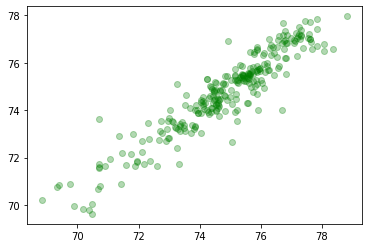

In [17]:
import matplotlib.pyplot as plt
plt.scatter(test_labels, preds, alpha = 0.3, c = 'g')

for x, y in zip(y_test, preds):
    print("%4.5f - %4.5f" % (x,y))

**Análise resultados**

In [18]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
print((cv_results).tail())

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
169         0.510835        0.005595        0.688354       0.034437
170         0.509483        0.005294        0.687804       0.034673
171         0.507572        0.005134        0.687140       0.034454
172         0.506451        0.005219        0.686885       0.034909
173         0.504984        0.005295        0.686277       0.035048


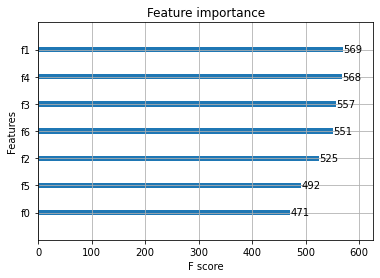

In [19]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

**Novos resultados**

In [20]:
new_input = pd.read_excel('Pecem_19.xlsx')
new_input.tail()

,Excesso_O2,T_out_coal_mill_A,Mill_A_classifier_velocity,Secondary_air_flow_A,Pressao_do_coletor_de_Ar_Secundario,Pressao_do_coletor_de_Ar_Primario,Flow_primary_air_Mill_A,Efficiency
6680,1.52760,78.22266,109.81761,72.08643,16.22159,89.27490,23.86728,84.827
6681,1.58930,78.22266,109.55209,71.19142,16.31651,88.74727,23.69873,84.845
6682,1.55646,78.22266,109.45068,71.10107,16.40381,88.99776,23.70218,84.905
6683,1.53290,78.22266,109.45068,71.16896,16.29375,88.91680,23.79477,84.439
6684,1.33080,78.22266,109.79638,71.37047,16.32463,88.32266,23.83669,84.346


In [21]:
X_new_input = new_input.drop('Efficiency', axis =1)

In [22]:
X_new = scaler.fit_transform(X_new_input)
y_new= new_input['Efficiency']

In [23]:
data_dmatrix_new = xgb.DMatrix(X_new,label=y_new)

In [24]:
new_y= best_model.predict(data_dmatrix_new).flatten()

In [25]:
print(*new_y, sep = "\n") 

72.19758
72.16879
72.19456
71.63446
71.37568
71.21953
71.06866
71.277084
71.152435
71.13242
71.18217
71.24699
71.27418
71.27418
71.27418
71.24404
71.261116
71.27111
71.261116
71.28139
71.28861
71.28861
71.30888
71.4122
71.48284
71.509674
71.40172
71.632324
71.575676
71.70789
71.836624
72.15131
72.02712
72.21711
72.16773
72.338135
72.37897
72.45754
72.41899
72.47674
72.401955
72.590355
73.16266
73.216446
73.25474
72.967896
73.14292
73.14289
73.100426
72.23559
71.79325
71.77779
72.025024
72.14007
72.21401
72.21617
72.263214
72.0378
72.10609
72.09251
72.1278
72.075165
72.13025
72.38665
72.29975
72.21153
72.28217
72.02817
71.86354
71.72451
71.81617
71.70227
72.10224
72.108955
73.184494
73.4382
73.46996
73.08865
72.82351
72.83709
72.84694
73.04755
72.28717
72.30317
72.11436
71.91885
71.93965
71.59986
71.501015
71.73506
71.68128
71.64374
71.67097
71.93535
72.78052
72.79128
72.79026
72.85739
72.84424
72.825356
72.57409
73.09636
73.41963
73.4298
73.31438
73.08609
73.000206
73.29293
73.40574
72

72.301155
72.301155
72.42892
72.44061
72.37545
72.34014
72.47815
72.61611
72.6761
72.43567
72.58087
72.602554
72.90739
72.62665
72.613434
72.48486
72.569916
72.52668
72.689865
72.74195
72.855995
72.78263
72.76256
72.86714
72.931656
72.913185
72.735176
72.582
72.43933
72.5579
72.84482
72.76988
72.75169
72.83411
72.49862
72.53258
72.71695
72.59367
72.636635
72.73049
72.54114
72.56851
72.58566
72.517136
72.471535
72.32702
72.33616
72.332375
71.620125
71.6069
71.429634
71.38684
71.43855
71.47715
72.34299
72.32702
72.48127
72.77124
72.48535
72.38374
72.387825
72.47301
72.462395
72.50132
72.65839
72.636925
72.64925
72.44061
72.63431
72.47562
72.47562
72.45949
72.44667
72.46025
72.45111
72.44779
72.85933
72.91645
72.76103
72.62575
72.446434
72.416405
72.41176
72.30192
72.28834
72.30192
72.30192
72.40664
72.40664
72.40664
72.37116
72.45778
72.446625
72.43567
71.719635
71.734375
72.27157
72.50639
72.446625
72.49734
72.45778
72.46057
72.57513
72.78544
72.778915
72.416405
72.32702
72.32702
72.336

72.41187
72.45296
72.38374
72.32294
72.332375
72.34299
72.32294
72.32702
72.32702
72.306595
72.332375
72.33616
72.34299
72.33616
71.99945
72.01267
72.059044
72.04371
72.06603
72.04371
72.07547
71.98007
72.079254
72.01054
71.99218
71.43855
72.31595
72.33616
72.37362
72.32702
72.301155
72.32702
72.301155
72.35728
72.48535
72.7419
72.73181
72.72325
72.73181
72.73181
72.74701
72.72074
72.75522
72.74608
72.67629
72.64124
72.63716
72.63716
72.63716
72.63323
72.63323
72.753845
72.742
72.79149
72.68543
72.68543
72.725334
72.67629
72.76571
72.76768
72.77146
72.76354
72.728065
72.73814
72.63431
72.46025
72.71393
72.60544
72.75015
72.69362
72.75705
72.72423
72.93362
72.736435
72.74296
72.74296
72.76489
72.66473
72.60921
72.50639
72.46057
72.4745
72.47815
72.45041
72.43567
72.45041
72.33616
72.28853
72.32256
72.37362
72.332375
72.32294
72.332375
72.16445
72.31402
72.32294
72.332375
72.32702
72.33616
72.332375
72.32294
72.33616
72.32702
72.306595
72.332375
72.33616
71.99945
72.01267
72.0195
71.9994

71.58458
71.39367
71.38319
71.392624
71.23505
71.4586
71.17968
71.17968
71.15881
71.15881
71.14371
71.15509
71.37699
71.51191
71.37699
71.747955
71.4034
72.208244
72.33616
72.332375
72.31846
72.27188
72.16445
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.230156
72.368
72.39799
72.40518
72.230156
72.235214
72.0907
72.0907
72.0907
72.0907
72.230156
72.43421
72.40518
72.316666
72.235214
72.258415
72.0907
72.40518
72.39799
72.24903
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.235214
72.39799
72.39799
72.39799
72.41945
72.3842
72.40737
72.39799
72.414566
72.39799
72.39799
72.21764
72.40737
72.414566
72.258415
72.39799
72.316666
72.235214
72.316666
72.235214
72.316666
72.316666
72.258415
72.286255
72.258415
72.24903
72.316666
72.39799
72.39799
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.0907
72.316666
72.316666
72.29779
72.26431
72.20351
72.20351
72.20351
72.20351
72.1000

https://www.datacamp.com/community/tutorials/xgboost-in-python

In [26]:
test= pd.read_excel('Pecem_19.xlsx')
real = test['Efficiency']

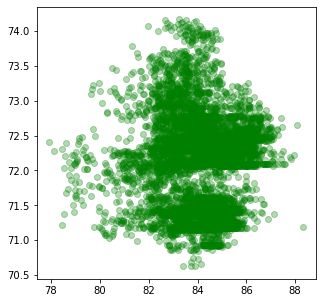

In [27]:
plt.scatter(real, new_y, alpha = 0.3, c = 'g')

In [28]:
rmse = np.sqrt(mean_squared_error(real, new_y))
mae = mean_absolute_error(real, new_y)
r2 = r2_score(real, new_y)

print("MAE: %f" % (mae))
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

MAE: 11.964156
RMSE: 12.062597
R2: -77.181323
